# Advance Regression Assignment - Sweta Singh

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import os
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [4]:
# Importing dataset
df = pd.read_csv("train.csv", encoding = 'utf-8')

### Understanding the dataframe

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df.shape

(1460, 81)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
# Checking percentage of NaN values
round(100*(df.isnull().sum()/len(df.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [11]:
len(df.columns)

81

### Data Cleaning

In [12]:
# Changing all year columns to their age
# Current year - Year

today = str(datetime.date.today())
currentYear = int(today[:4])

df.YearBuilt = pd.to_numeric(df.YearRemodAdd, errors='coerce')
df.YearRemodAdd = pd.to_numeric(df.YearRemodAdd, errors='coerce')
df.YrSold = pd.to_numeric(df.YrSold, errors='coerce')
df.GarageYrBlt = pd.to_numeric(df.GarageYrBlt, errors='coerce')

df['AgeYearBuilt'] = currentYear - df['YearBuilt']
df['AgeRemodAdd'] = currentYear - df['YearRemodAdd']
df['AgeSold'] = currentYear - df['YrSold']
df['AgeGarageYrBlt'] = currentYear - df['GarageYrBlt']

df = df.drop(['YearBuilt', 'YearRemodAdd','YrSold', 'GarageYrBlt'], 1)

In [13]:
# Replacing NaN with None
# Checking from data dictionary where NA is an actual data field

df['Alley'].fillna('None', inplace=True)
df['BsmtQual'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['BsmtFinType1'].fillna('None', inplace=True)
df['BsmtFinType2'].fillna('None', inplace=True)
df['FireplaceQu'].fillna('None', inplace=True)
df['GarageType'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageCond'].fillna('None', inplace=True)
df['PoolQC'].fillna('None', inplace=True)
df['Fence'].fillna('None', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)
df['AgeGarageYrBlt'].fillna(2019, inplace=True)

In [14]:
# Checking percentage of NaN values
round(100*(df.isnull().sum()/len(df.index)),2)

Id                 0.00
MSSubClass         0.00
MSZoning           0.00
LotFrontage       17.74
LotArea            0.00
Street             0.00
Alley              0.00
LotShape           0.00
LandContour        0.00
Utilities          0.00
LotConfig          0.00
LandSlope          0.00
Neighborhood       0.00
Condition1         0.00
Condition2         0.00
BldgType           0.00
HouseStyle         0.00
OverallQual        0.00
OverallCond        0.00
RoofStyle          0.00
RoofMatl           0.00
Exterior1st        0.00
Exterior2nd        0.00
MasVnrType         0.55
MasVnrArea         0.55
ExterQual          0.00
ExterCond          0.00
Foundation         0.00
BsmtQual           0.00
BsmtCond           0.00
                  ...  
KitchenQual        0.00
TotRmsAbvGrd       0.00
Functional         0.00
Fireplaces         0.00
FireplaceQu        0.00
GarageType         0.00
GarageFinish       0.00
GarageCars         0.00
GarageArea         0.00
GarageQual         0.00
GarageCond      

In [15]:
len(df.columns)

81

In [16]:
# Filling average value in 'LotFrontage' in Nan rows with mean of 'LotFrontage'
df['LotFrontage'].fillna((df['LotFrontage'].mean()), inplace = True)

In [17]:
# Removing rows where 'MasVnrType', 'MasVnrArea', 'Electrical' is NaN
df = df[pd.notnull(df['MasVnrType'])]
df = df[pd.notnull(df['MasVnrArea'])]
df = df[pd.notnull(df['Electrical'])]

In [18]:
# Checking percentage of NaN values
round(100*(df.isnull().sum()/len(df.index)),2)

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage       0.0
LotArea           0.0
Street            0.0
Alley             0.0
LotShape          0.0
LandContour       0.0
Utilities         0.0
LotConfig         0.0
LandSlope         0.0
Neighborhood      0.0
Condition1        0.0
Condition2        0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
RoofStyle         0.0
RoofMatl          0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        0.0
MasVnrArea        0.0
ExterQual         0.0
ExterCond         0.0
Foundation        0.0
BsmtQual          0.0
BsmtCond          0.0
                 ... 
KitchenQual       0.0
TotRmsAbvGrd      0.0
Functional        0.0
Fireplaces        0.0
FireplaceQu       0.0
GarageType        0.0
GarageFinish      0.0
GarageCars        0.0
GarageArea        0.0
GarageQual        0.0
GarageCond        0.0
PavedDrive        0.0
WoodDeckSF        0.0
OpenPorchSF       0.0
EnclosedPo

In [19]:
#Checking shape after data cleaning process
df.shape

(1451, 81)

## Visualisation

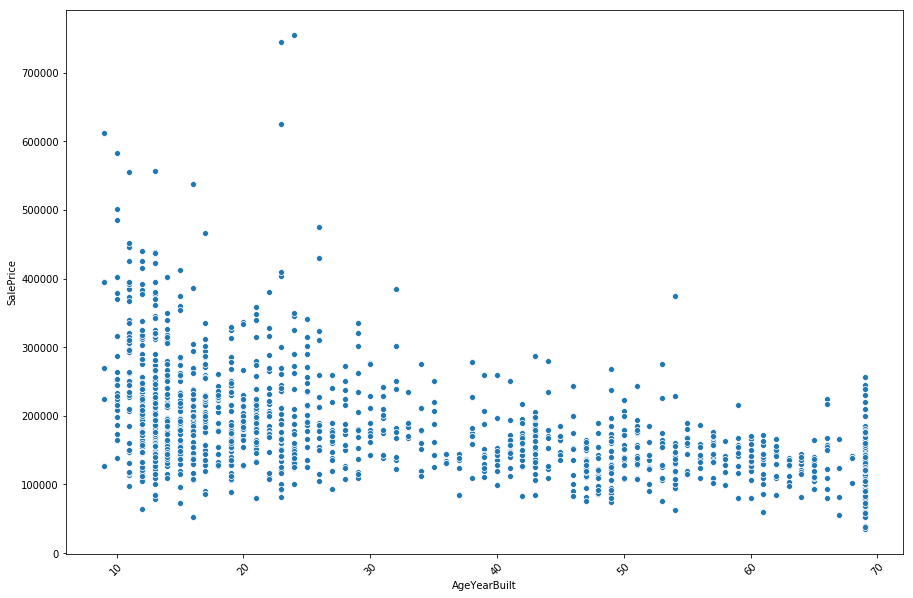

In [20]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="AgeYearBuilt", y="SalePrice", data=df)
plt.xticks(rotation=45)
plt.show()

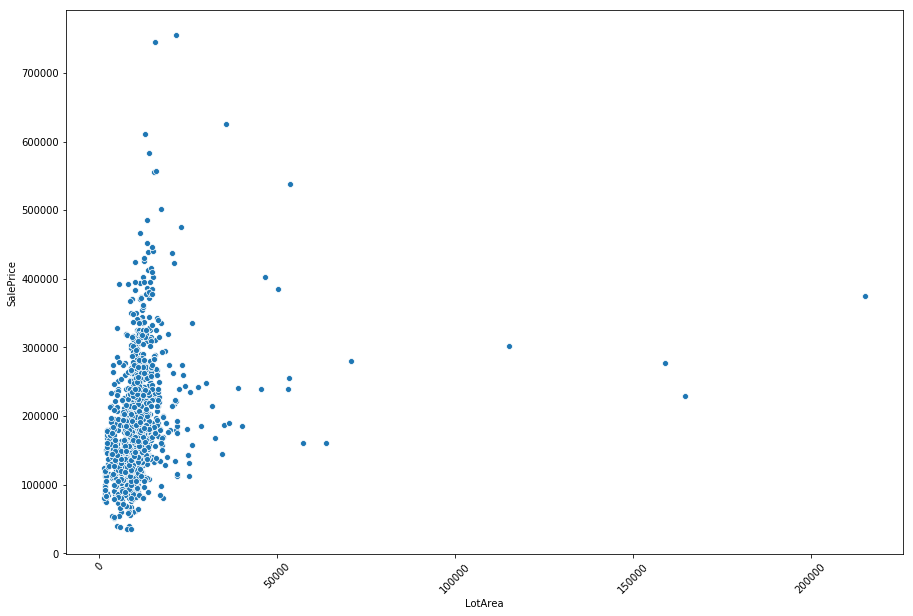

In [21]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="LotArea", y="SalePrice", data=df)
plt.xticks(rotation=45)
plt.show()

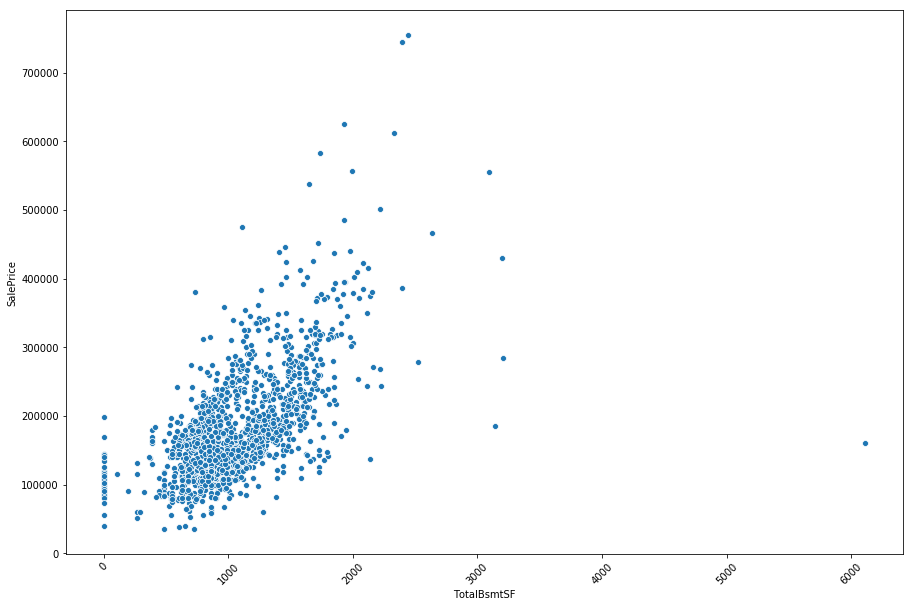

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=df)
plt.xticks(rotation=45)
plt.show()

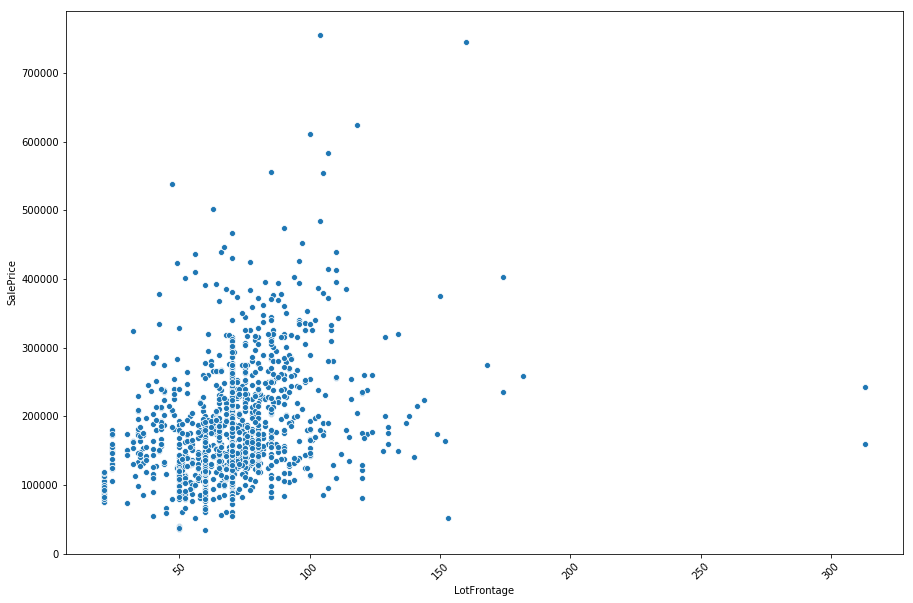

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="LotFrontage", y="SalePrice", data=df)
plt.xticks(rotation=45)
plt.show()

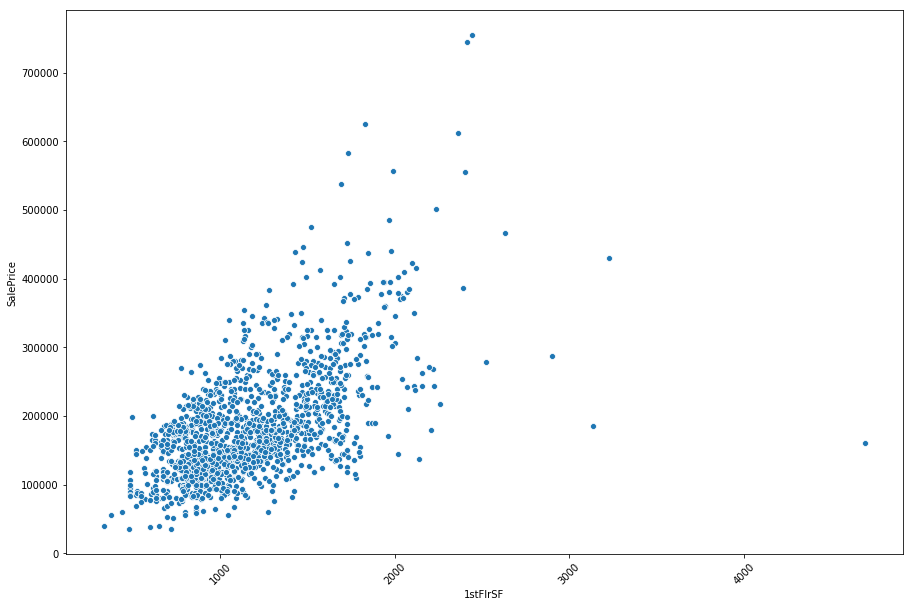

In [24]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="1stFlrSF", y="SalePrice", data=df)
plt.xticks(rotation=45)
plt.show()

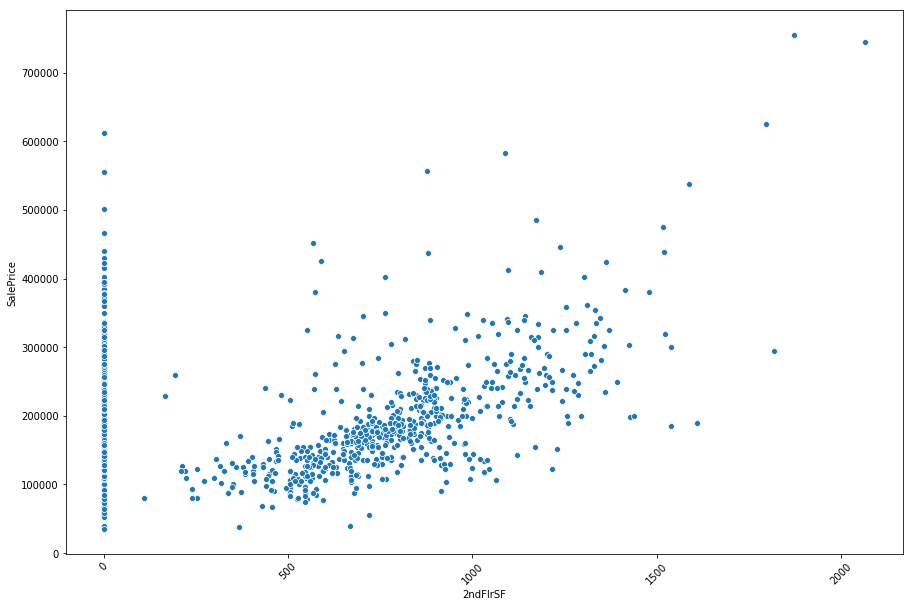

In [25]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="2ndFlrSF", y="SalePrice", data=df)
plt.xticks(rotation=45)
plt.show()

## Checking Correlations

In [26]:
# All numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeYearBuilt,AgeRemodAdd,AgeSold,AgeGarageYrBlt
0,1,60,65.0,8450,7,5,196.0,706,0,150,...,0,0,0,0,2,208500,16,16,11,16.0
1,2,20,80.0,9600,6,8,0.0,978,0,284,...,0,0,0,0,5,181500,43,43,12,43.0
2,3,60,68.0,11250,7,5,162.0,486,0,434,...,0,0,0,0,9,223500,17,17,11,18.0
3,4,70,60.0,9550,7,5,0.0,216,0,540,...,0,0,0,0,2,140000,49,49,13,21.0
4,5,60,84.0,14260,8,5,350.0,655,0,490,...,0,0,0,0,12,250000,19,19,11,19.0


In [27]:
# Correlation matrix
cor = df_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeYearBuilt,AgeRemodAdd,AgeSold,AgeGarageYrBlt
Id,1.000000,0.011119,-0.011194,-0.032789,-0.032075,0.013595,-0.049736,-0.006218,-0.005213,-0.007841,...,-0.046455,0.002058,0.057388,-0.006025,0.019499,-0.025188,0.025398,0.025398,-0.002630,-0.012699
MSSubClass,0.011119,1.000000,-0.355385,-0.138039,0.034799,-0.061147,0.023156,-0.069241,-0.066037,-0.138789,...,-0.044009,-0.026316,0.008240,-0.007773,-0.013659,-0.082760,-0.040664,-0.040664,0.021583,0.080963
LotFrontage,-0.011194,-0.355385,1.000000,0.306918,0.232694,-0.052502,0.179774,0.217204,0.043693,0.119975,...,0.062581,0.038007,0.181349,0.001244,0.009554,0.333343,-0.082311,-0.082311,-0.007669,-0.100268
LotArea,-0.032789,-0.138039,0.306918,1.000000,0.106305,-0.002297,0.104141,0.213081,0.111674,-0.004250,...,0.020568,0.043498,0.077885,0.038221,0.003177,0.264668,-0.015190,-0.015190,0.012969,-0.072587
OverallQual,-0.032075,0.034799,0.232694,0.106305,1.000000,-0.090940,0.411699,0.236421,-0.058211,0.309461,...,0.030972,0.066271,0.065720,-0.031183,0.068514,0.790085,-0.550499,-0.550499,0.025116,-0.289070
OverallCond,0.013595,-0.061147,-0.052502,-0.002297,-0.090940,1.000000,-0.128333,-0.042292,0.039234,-0.137104,...,0.025123,0.053925,-0.002254,0.068617,-0.004210,-0.076361,-0.075545,-0.075545,-0.043487,0.005488
MasVnrArea,-0.049736,0.023156,0.179774,0.104141,0.411699,-0.128333,1.000000,0.264469,-0.072443,0.114298,...,0.018752,0.061367,0.011697,-0.029854,-0.006159,0.477486,-0.180136,-0.180136,0.008147,-0.133906
BsmtFinSF1,-0.006218,-0.069241,0.217204,0.213081,0.236421,-0.042292,0.264469,1.000000,-0.049498,-0.496605,...,0.026926,0.063139,0.141361,0.003852,-0.016387,0.383995,-0.128422,-0.128422,-0.016969,-0.115602
BsmtFinSF2,-0.005213,-0.066037,0.043693,0.111674,-0.058211,0.039234,-0.072443,-0.049498,1.000000,-0.209806,...,-0.030211,0.088430,0.041597,0.004784,-0.014977,-0.010350,0.066485,0.066485,-0.031880,-0.035614
BsmtUnfSF,-0.007841,-0.138789,0.119975,-0.004250,0.309461,-0.137104,0.114298,-0.496605,-0.209806,1.000000,...,0.020825,-0.012585,-0.035168,-0.023884,0.033297,0.215707,-0.182219,-0.182219,0.040340,-0.042815


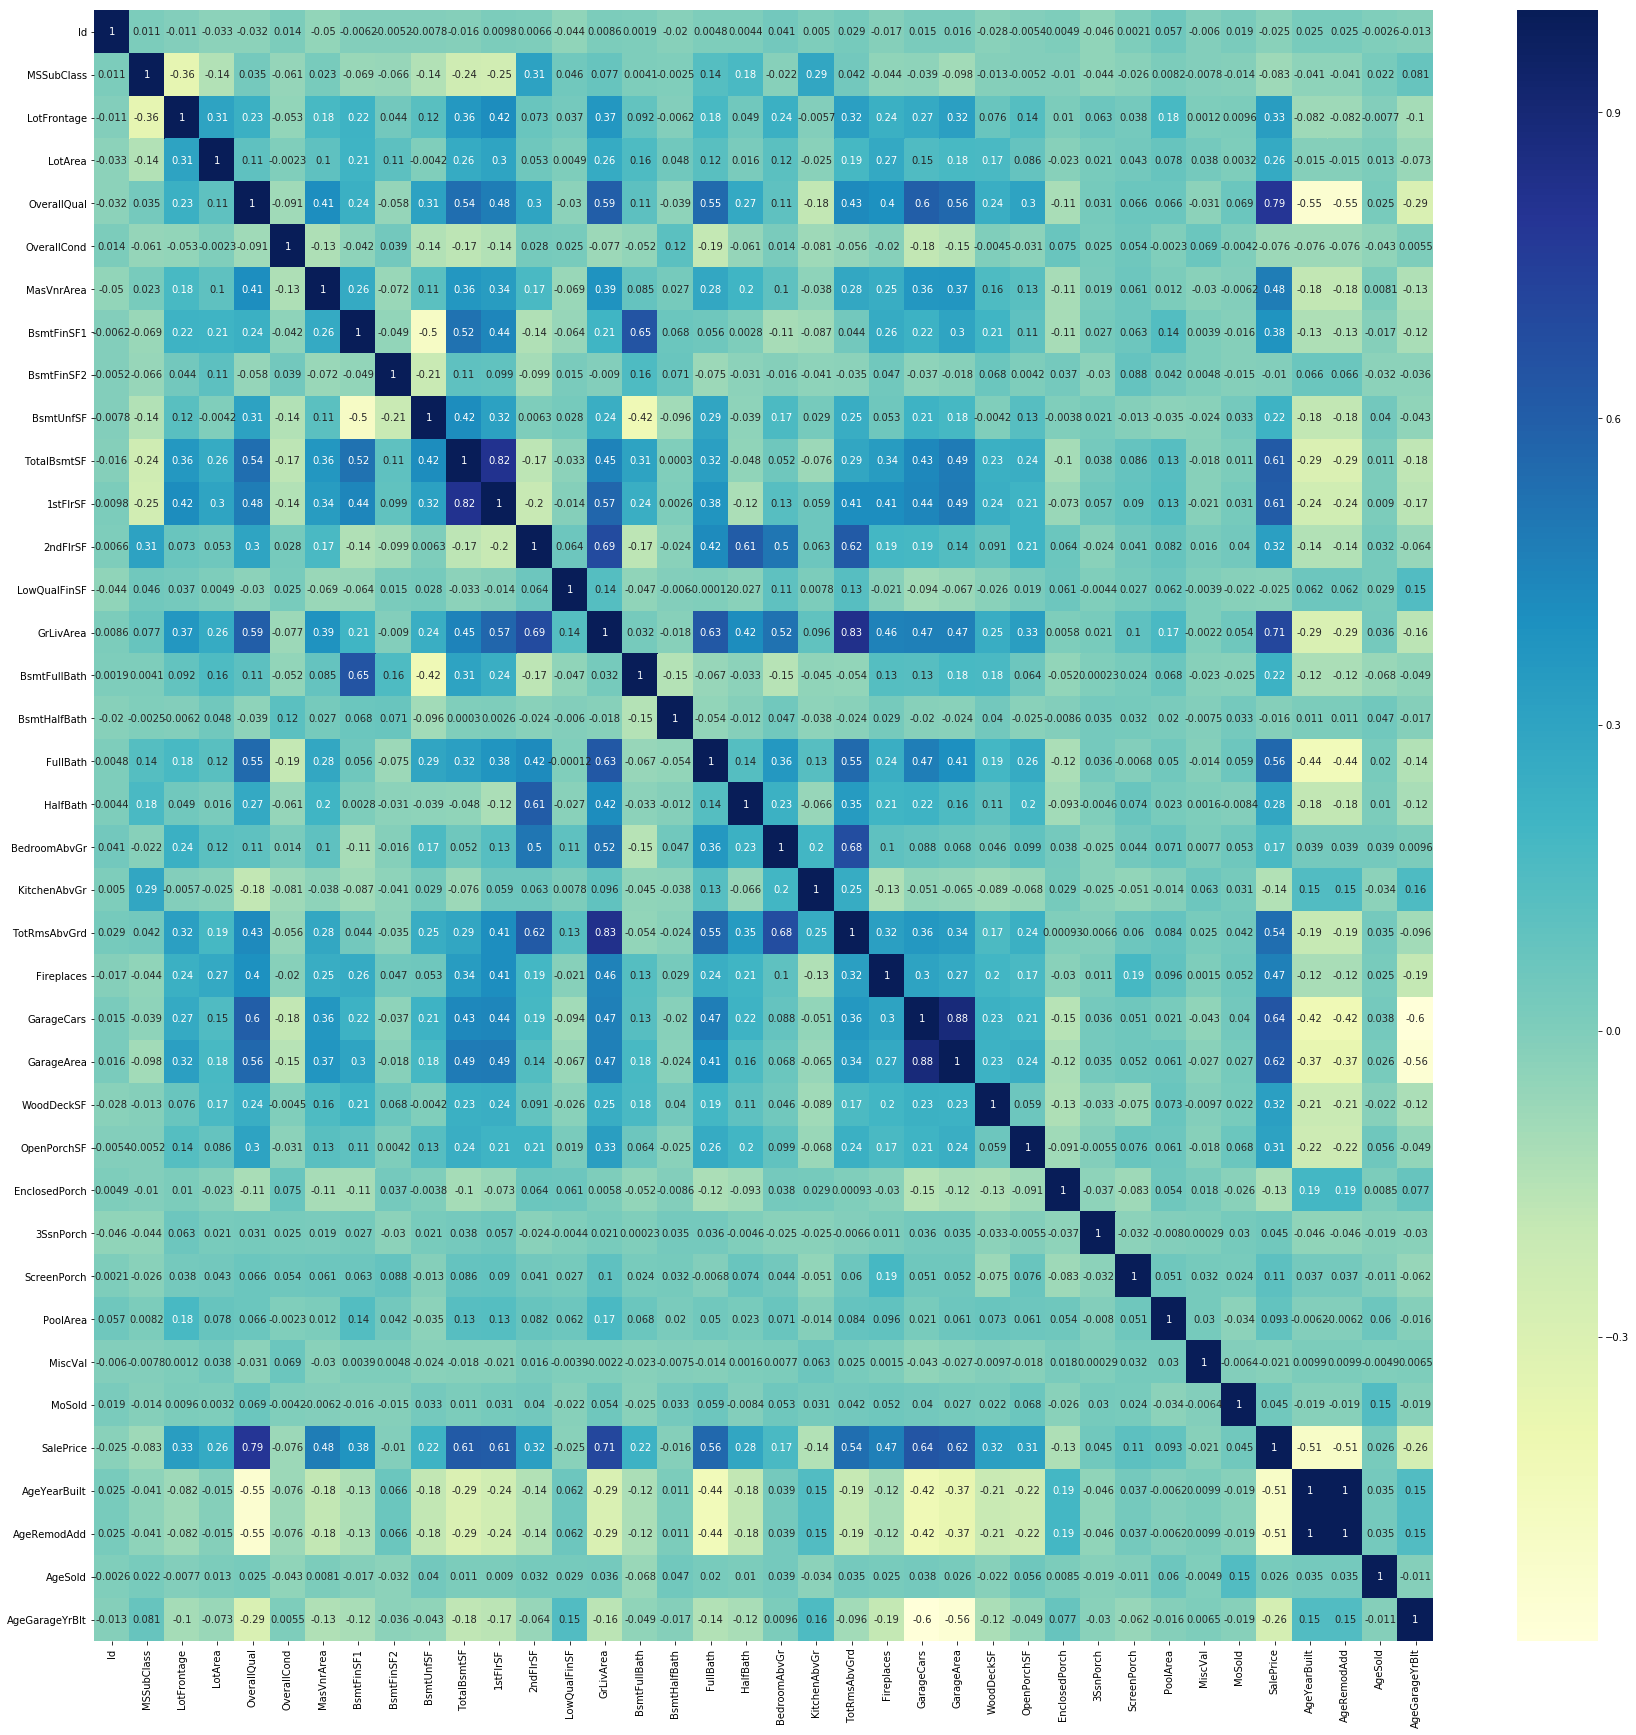

In [28]:
# Figure size
plt.figure(figsize=(30,30))
# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### Creating Dummies for categorical features

In [29]:
def functional_mapper(x):
    return x.map({'Typ': 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})

def fence_mapper(x):
    return x.map({'GdPrv': 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, "None": 0})

def rating_mapper(x):
    return x.map({'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0})

def rating_mapper1(x):
    return x.map({'Gd': 4, "Av": 3, "Mn": 2, "No": 1, "None": 0})

def house_status_mapper(x):
    return x.map({'Fin': 3, "RFn": 2, "Unf": 1, "None": 0})

def plot_shape_mapper(x):
    return x.map({'Reg': 3, "IR1": 2, "IR2": 1, "IR3": 0})

def rating_mapper2(x):
    return x.map({'GLQ': 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, 'Unf': 1, 'None': 0})

def sloper_mapper(x):
    return x.map({'Gtl': 2, "Mod": 1, "Sev": 0})

# Applying the function to the columns
df[['LotShape']] = df[['LotShape']].apply(plot_shape_mapper)
df[['LandSlope']] = df[['LandSlope']].apply(sloper_mapper)
df[['Functional']] = df[['Functional']].apply(functional_mapper)
df[['Fence']] = df[['Fence']].apply(fence_mapper)
df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']] = df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']].apply(rating_mapper)
df[['BsmtExposure']] = df[['BsmtExposure']].apply(rating_mapper1)
df[['BsmtFinType1', 'BsmtFinType2']] = df[['BsmtFinType1', 'BsmtFinType2']].apply(rating_mapper2)
df[['GarageFinish']] = df[['GarageFinish']].apply(house_status_mapper)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
Id                1451 non-null int64
MSSubClass        1451 non-null int64
MSZoning          1451 non-null object
LotFrontage       1451 non-null float64
LotArea           1451 non-null int64
Street            1451 non-null object
Alley             1451 non-null object
LotShape          1451 non-null int64
LandContour       1451 non-null object
Utilities         1451 non-null object
LotConfig         1451 non-null object
LandSlope         1451 non-null int64
Neighborhood      1451 non-null object
Condition1        1451 non-null object
Condition2        1451 non-null object
BldgType          1451 non-null object
HouseStyle        1451 non-null object
OverallQual       1451 non-null int64
OverallCond       1451 non-null int64
RoofStyle         1451 non-null object
RoofMatl          1451 non-null object
Exterior1st       1451 non-null object
Exterior2nd       1451 non-null object
Ma

In [31]:
# Checking percentage of NaN values
round(100*(df.isnull().sum()/len(df.index)),2)

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage       0.0
LotArea           0.0
Street            0.0
Alley             0.0
LotShape          0.0
LandContour       0.0
Utilities         0.0
LotConfig         0.0
LandSlope         0.0
Neighborhood      0.0
Condition1        0.0
Condition2        0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
RoofStyle         0.0
RoofMatl          0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        0.0
MasVnrArea        0.0
ExterQual         0.0
ExterCond         0.0
Foundation        0.0
BsmtQual          0.0
BsmtCond          0.0
                 ... 
KitchenQual       0.0
TotRmsAbvGrd      0.0
Functional        0.0
Fireplaces        0.0
FireplaceQu       0.0
GarageType        0.0
GarageFinish      0.0
GarageCars        0.0
GarageArea        0.0
GarageQual        0.0
GarageCond        0.0
PavedDrive        0.0
WoodDeckSF        0.0
OpenPorchSF       0.0
EnclosedPo

#### Data Preparation

Let's now prepare the data and build the model.

In [32]:
# split into X and y
X = df.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition',
       'AgeSold', 'AgeGarageYrBlt', 'AgeYearBuilt', 'AgeRemodAdd']]
y = df['SalePrice']

In [33]:
# Subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType',
       'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [34]:
# Convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [35]:
# Drop categorical variable columns
X = X.drop(list(df_categorical.columns), axis=1)

In [36]:
# Concatenate dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [37]:
# Let's check the first few rows
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,2,7,5,196.0,4,3,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,2,6,8,0.0,3,3,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,2,2,7,5,162.0,4,3,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,2,2,7,5,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,2,2,8,5,350.0,4,3,...,0,0,0,0,1,0,0,0,1,0


## Scaling the data

In [38]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  import sys


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=201)

In [39]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building and Evaluation


## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

### Ridge Regression

In [40]:
# list of alphas to tune
list_alpha = [0.1, 0.5, 1.0, 5.0, 20, 
 40, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 
 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
params = {'alpha': list_alpha}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 20, 40, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [41]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009925,0.005873,0.002134,0.001643,0.1,{'alpha': 0.1},-24743.067428,-15902.506131,-23518.261830,-30921.507597,...,-23276.895743,4877.318202,26,-13168.503513,-14549.996031,-14068.440172,-13553.311103,-13431.364752,-13754.323114,493.894210
1,0.006714,0.001379,0.001487,0.000277,0.5,{'alpha': 0.5},-24652.858896,-15926.457273,-23377.842988,-25625.456974,...,-22155.309162,3449.554053,25,-13196.070072,-14564.522598,-14077.131269,-13849.249222,-13445.373534,-13826.469339,479.731214
2,0.006713,0.002278,0.001389,0.000407,1,{'alpha': 1.0},-24598.199714,-15991.085597,-23184.862599,-23710.081298,...,-21723.679744,3083.954264,24,-13216.715905,-14582.760367,-14075.745164,-13960.398585,-13452.060259,-13857.536056,481.499180
3,0.005714,0.001106,0.001236,0.000338,5,{'alpha': 5.0},-24396.086021,-16461.418935,-22105.727589,-20744.324302,...,-20948.652394,2584.887382,23,-13269.713635,-14807.914939,-14241.445129,-14299.070587,-13671.040913,-14057.837041,533.904889
4,0.006189,0.000698,0.001319,0.000327,20,{'alpha': 20},-24050.536281,-17449.482142,-20888.787685,-19652.660533,...,-20613.285271,2144.412370,22,-13310.245583,-15472.180346,-14875.480167,-15087.859381,-14489.313832,-14647.015862,740.170262


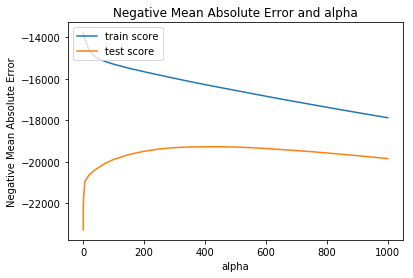

In [42]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [43]:
# Checking best parameter (alpha)
model_cv.best_params_

{'alpha': 450}

In [60]:
#It is confirmed by graph as well
alpha = 450
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.62847352e+03,  2.54138485e+02,  2.70159343e+03, -4.43848152e+02,
       -9.93508789e+02,  8.75673818e+03,  2.67845590e+03,  3.93857574e+03,
        3.84462220e+03,  4.88661956e+02,  4.04199491e+03, -6.38267708e+02,
        4.56293831e+03,  3.56419131e+03, -2.58833485e+02, -1.05133602e+03,
        2.86343619e+03,  1.64064531e+03,  5.59397278e+03,  4.53280033e+03,
        4.11861229e+02,  7.89680514e+03,  2.90183024e+03, -7.65106097e+02,
        3.43155290e+03,  2.28473674e+03,  2.95645109e+02, -1.83724777e+03,
        4.44985555e+03,  5.29765661e+03,  2.37809537e+03,  2.93902925e+03,
        1.80256907e+03,  1.92013634e+03,  5.17718807e+03,  3.00706775e+03,
       -4.05401370e+02,  7.37875564e+02,  2.04994494e+03,  9.06935448e+02,
        6.01804580e+01,  1.11427683e+03,  1.78624866e+03,  5.11384324e+02,
        8.50043162e+02, -2.92899284e+01,  2.45964932e+01,  3.93038033e+02,
        8.50457630e+01,  7.79926102e+02, -1.27349426e+03, -1.27349426e+03,
        5.76471450e+02,  

In [61]:
alpha = 450
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)

In [46]:
mse = np.mean((pred - y_test)**2)
mse

946245881.9367675

In [47]:
ridge.score(X_test,y_test)

0.8505612701898606

In [48]:
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [63]:
print("Ridge:", pretty_print_linear(ridge.coef_,names=list(X_test),sort=True))

Ridge model: 8756.738 * OverallQual + 7896.805 * GrLivArea + -6029.364 * Condition2_PosN + 5832.567 * Neighborhood_NridgHt + 5593.973 * 1stFlrSF + 5570.832 * Neighborhood_NoRidge + 5297.657 * TotRmsAbvGrd + 5177.188 * GarageCars + 4562.938 * BsmtExposure + 4532.8 * 2ndFlrSF + 4449.856 * KitchenQual + 4041.995 * BsmtQual + 3938.576 * MasVnrArea + 3844.622 * ExterQual + 3770.973 * RoofMatl_WdShngl + 3656.895 * Neighborhood_StoneBr + 3564.191 * BsmtFinType1 + 3431.553 * FullBath + 3007.068 * GarageArea + 2939.029 * Fireplaces + 2902.108 * RoofMatl_CompShg + 2901.83 * BsmtFullBath + 2863.436 * TotalBsmtSF + 2701.593 * LotArea + 2678.456 * OverallCond + 2635.455 * Exterior2nd_ImStucc + -2628.474 * MSSubClass + 2520.332 * Neighborhood_Crawfor + -2423.646 * RoofStyle_Gable + 2378.095 * Functional + 2344.773 * LandContour_HLS + -2306.102 * Neighborhood_Edwards + 2284.737 * HalfBath + 2207.307 * RoofStyle_Hip + -2182.447 * BldgType_TwnhsE + 2107.505 * Condition1_Norm + 2049.945 * WoodDeckSF + 2

### Lasso Regression

In [50]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: Converg

[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    5.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 20, 40, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [51]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.113949,0.016195,0.002576,0.000734,0.1,{'alpha': 0.1},-24668.938765,-15927.498495,-23745.019510,-27603.378702,...,-22648.861207,3919.874788,26,-13186.753263,-14568.228926,-14097.408442,-13763.346016,-13464.958412,-13816.139012,483.113458
1,0.095732,0.023578,0.001844,0.000504,0.5,{'alpha': 0.5},-24683.572081,-15926.617882,-23686.905791,-27550.064805,...,-22624.751833,3906.613246,25,-13187.254437,-14568.325125,-14097.411346,-13765.469586,-13463.857564,-13816.463612,483.127926
2,0.098527,0.009507,0.001991,0.000669,1,{'alpha': 1.0},-24687.535766,-15925.504320,-23614.960038,-27484.221165,...,-22595.772063,3887.678498,24,-13187.950822,-14568.619168,-14097.570801,-13768.217164,-13462.863556,-13817.044302,483.145235
3,0.083697,0.006238,0.002040,0.001144,5,{'alpha': 5.0},-24647.239148,-15936.902901,-23335.978833,-26975.180736,...,-22416.286802,3744.387568,23,-13194.765248,-14571.780832,-14101.993765,-13793.465339,-13459.394685,-13824.279974,482.962129
4,0.092560,0.015900,0.001284,0.000228,20,{'alpha': 20},-24494.072134,-15861.215130,-23079.352370,-25193.032102,...,-21920.251984,3355.212468,22,-13241.169264,-14590.995978,-14108.961257,-13882.456231,-13482.041257,-13861.124797,473.843661


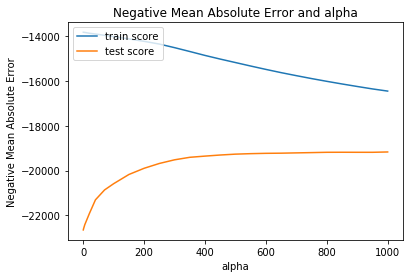

In [52]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [53]:
# Checking best parameter (alpha)
model_cv.best_params_

{'alpha': 1000}

In [54]:
#It is confirmed by graph as well

alpha = 1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1080, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
lasso.coef_

array([-6.70562738e+03, -0.00000000e+00,  3.04466592e+03, -0.00000000e+00,
       -0.00000000e+00,  1.66175658e+04,  2.55010501e+03,  2.74154350e+03,
        3.71906267e+03,  0.00000000e+00,  3.28070837e+03, -0.00000000e+00,
        6.24596126e+03,  4.12069853e+03, -0.00000000e+00, -4.44901879e+02,
        0.00000000e+00,  1.22177405e+03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.76636123e+04,  3.32454283e+03, -0.00000000e+00,
        5.90322776e+02,  5.07490259e+01, -0.00000000e+00, -4.80542822e+02,
        4.70151351e+03,  4.63560000e+02,  2.82686290e+03,  2.21225091e+03,
        0.00000000e+00,  9.75998437e+02,  8.10678321e+03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  9.72484551e+02,  0.00000000e+00,
       -8.97680552e+01,  2.46165823e+02,  7.65663134e+02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.08757518e+03, -4.70468477e-13,
        0.00000000e+00,  

In [56]:
alpha = 1000
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

In [57]:
mse = np.mean((pred - y_test)**2)
mse

1014055880.7738847

In [58]:
lasso.score(X_test,y_test)

0.8398521719648784

In [62]:
print("Lasso:", pretty_print_linear(lasso.coef_,names=list(X_test) ,sort=True))

Lasso: 27663.612 * GrLivArea + 16617.566 * OverallQual + -10295.179 * Condition2_PosN + 8106.783 * GarageCars + 8086.288 * Neighborhood_NridgHt + -6705.627 * MSSubClass + 6245.961 * BsmtExposure + 5970.666 * Neighborhood_NoRidge + 4701.514 * KitchenQual + 4120.699 * BsmtFinType1 + 3719.063 * ExterQual + 3710.928 * Neighborhood_StoneBr + 3478.872 * SaleType_New + 3347.769 * RoofMatl_WdShngl + 3324.543 * BsmtFullBath + 3280.708 * BsmtQual + -3076.067 * RoofStyle_Gable + 3044.666 * LotArea + 2826.863 * Functional + 2775.477 * RoofMatl_CompShg + 2741.544 * MasVnrArea + 2669.312 * Neighborhood_Crawfor + 2555.182 * Condition1_Norm + 2550.105 * OverallCond + -2525.816 * Exterior2nd_Stucco + 2212.251 * Fireplaces + 1954.973 * LotConfig_CulDSac + 1945.164 * Exterior2nd_CmentBd + 1944.148 * Exterior1st_BrkFace + -1709.979 * MSZoning_RM + 1620.321 * Exterior2nd_ImStucc + 1597.852 * HouseStyle_1Story + -1399.156 * Exterior2nd_Wd Shng + -1362.372 * Heating_OthW + 1221.774 * HeatingQC + 1129.467 * L

# We have analysed both Ridge regression and Lasso regression models. Both models are giving very good R-Square score.

## SO TOP 7 FEAUTURES FROM ABOVE MODELS WOULD BE:
## * OverallQual
## * GrLivArea
## * Neighborhood
## * GarageCars
## * Condition1
## * BsmtExposure
## * KitchenQual